In [1]:
pip install scipy

In [24]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def merton_jump_paths(S,T,r,sigma,lam,m,v,steps,Npaths):
    store=[]
    for i in range(1,20):
        
        size=(steps,Npaths)
        dt= T/steps
        poi_rv= np.multiply(np.random.poisson(lam*dt,size=size),np.random.normal(m,v,size=size)).cumsum(axis=0)
        geo= np.cumsum(((r-sigma**2/2-lam*(m+v**2/2))*dt + sigma*np.sqrt(dt)*np.random.normal(size=size)),axis=0)
    
        store.append(np.exp(geo+poi_rv)*S)
    return store

In [27]:
S = 100 # current stock price
T = 1 # time to maturity
r = 0.01 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam =1 # intensity of jump i.e. number of jumps per annum
steps =250 # time steps
Npaths = 1 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process



store = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths)

In [40]:
type(store[0])

numpy.ndarray

In [32]:
def merton_jump_paths(S, T, r, sigma,  lam, m, v, steps, Npaths):
    size=(steps,Npaths)
    dt = T/steps 
    poi_rv = np.multiply(np.random.poisson( lam*dt, size=size),
                         np.random.normal(m,v, size=size)).cumsum(axis=0)
    geo = np.cumsum(((r -  sigma**2/2 -lam*(m  + v**2*0.5))*dt +\
                              sigma*np.sqrt(dt) * \
                              np.random.normal(size=size)), axis=0)
    
    return np.exp(geo+poi_rv)*S



In [33]:
len(j)

250

Text(0.5, 1.0, 'Jump Diffusion Process')

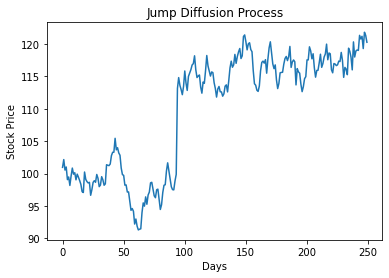

In [44]:
plt.plot(store[9])
#plt.plot(merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths))
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title('Jump Diffusion Process')

In [49]:
size=(5,1)
np.random.normal(size=size)

array([[-0.0192146 ],
       [-0.96877147],
       [ 0.86228472],
       [ 1.91936026],
       [ 1.10503331]])

In [ ]:
#https://demonstrations.wolfram.com/OptionPricesInMertonsJumpDiffusionModel/
#R. Merton, Continuous‐Time Finance, Oxford: Blackwell, 1998.

In [53]:
from scipy.stats import norm
#from scipy import minimize_scaler
from scipy.optimize import minimize
N= norm.cdf

In [55]:
def BS_call(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*N(d1)- K*np.exp(-r*T)*N(d2)

def BS_put(S,K,T,r,sigma):
    d1 = (np.log(S/K) + (r + sigma**2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*N(-d2) - S*N(-d1)

In [57]:
def MJ_call(S,K,T,r,sigma,m,v,lam):
    price=0 ## price of option
    for k in range(40):
        r_k= r- lam*(m-1) + (k*np.log(m))/T
        sigma_k= np.sqrt(sigma**2 + (k*v**2)/T)
        k_fact= np.math.factorial(k)
        price+= (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))*BS_call(S, K, T, r_k, sigma_k)
        
    return price

def MJ_put(S,K,T,r,sigma,m ,v,lam):
    price = 0 
    for k in range(40):
        r_k = r - lam*(m-1) + (k*np.log(m) ) / T
        sigma_k = np.sqrt( sigma**2 + (k* v** 2) / T)
        k_fact = np.math.factorial(k) # 
        price += (np.exp(-m*lam*T) * (m*lam*T)**k / (k_fact))*BS_put(S, K, T, r_k, sigma_k)
    return price

In [61]:
S = 100 # current stock price
T = 1 # time to maturity
r = 0.02 # risk free rate
m = 0 # meean of jump size
v = 0.3 # standard deviation of jump
lam = 1 # intensity of jump i.e. number of jumps per annum
steps =255 # time steps
Npaths =200000 # number of paths to simulate
sigma = 0.2 # annaul standard deviation , for weiner process
K =100
np.random.seed(3)
j = merton_jump_paths(S, T, r, sigma, lam, m, v, steps, Npaths) #generate jump diffusion paths

mcprice = np.maximum(j[-1]-K,0).mean() * np.exp(-r*T) # calculate value of call

cf_price =  MJ_call(S, K, T, r, sigma, np.exp(m+v**2*0.5) , v, lam)

print('Merton Price =', cf_price)
print('Monte Carlo Merton Price =', mcprice)
print('Black Scholes Price =', BS_CALL(S,K,T,r, sigma))

Merton Price = 14.500570058304778
Monte Carlo Merton Price = 14.597509592911369
Black Scholes Price = 8.916037278572539


In [62]:
#we don't actually need to simulate paths for European options, and it would be much faster to just simulate the terminal prices, but perhaps having the code like this will be useful for future posts on pricing exotic options.

In [64]:
#Volatility Smile paper result:

S=100
strikes= np.arange(50,150,1)
r=0.02
m=1
v=0.3
lam=1
sigma= 0.2
T=1

mjd_prices= MJ_call(S,strikes,T,r,sigma,m,v,lam)

### Volatility in Detail

In [75]:
def BS(r,q,S,K,T,sigma,Type):
    d1= (np.log(S/K)+(r+sigma**2/2)*T)/sigma*np.sqrt(T)
    d2= d1 - sigma*np.sqrt(T)
    if Type == 'C':
        price= S*norm.cdf(d1,0,1)*np.exp(-q*T)- K*norm.cdf(d2,0,1)*np.exp(-r*T)
    elif Type == 'P':
        price= K*norm.cdf(-d2,0,1)*np.exp(-1*r*T) - S*norm.cdf(-d1,0,1)*np.exp(-q*T)
    return price

In [83]:
#Taking 40k possible volatility values
vol_candidates= np.arange(start=0.01,stop=4,step=0.0001)
price_diff= np.zeros_like(vol_candidates)  #same array as vol_Cand

observed_price= 18
S=100
K= 115
r=0.05
q=0
T=1
'''
for i in range(len(vol_candidates)):
    
    candidate = vol_candidates[i]
    
    price_diff[i]=  observed_price - BS(r,q, S, K, T, candidate,'C')
'''
price_dif=  observed_price - BS(r,q, S, K, T, vol_candidates,'C')
idx= np.argmin(abs(price_dif))
#idx= np.argmin(abs(price_diff))
IV= vol_candidates[idx]
print("IV is: ",IV)

IV is:  0.5427999999999968


In [85]:
#Verifying
price_ver= BS(r,q, S, K, T,IV,'C')
print(price_ver)

17.998310436548692


In [86]:
#Newton Raphson Algo
#More efficient than above

#Require pde of B.S IV wrt sigma i.e vega
N_prime = norm.pdf

def vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + sigma**2/2)*T) / sigma*np.sqrt(T)
    vega = S*np.sqrt(T)*N_prime(d1)
    return vega
    

In [87]:
#https://quant.stackexchange.com/questions/7761/a-simple-formula-for-calculating-implied-volatility?rq=1
#paper by Brenner and Subrahmanyam (1988)
#For best initial guess of sigma

In [88]:
def IV_call(C, S, K, T, r, tol=0.0001,max_iter=100):
    #C observed Call Price
    sigma = 0.3   #initial guess
    
    for i in range(max_iter):
        diff = BS(r,q, S, K, T, sigma,'C') - C
        
        if abs(diff) < tol:
            print(f'found on {i}th iteration')
            print(f'difference is equal to {diff}')
            break

        ### use newton rapshon to update the estimate
        sigma = sigma - diff / vega(S, K, T, r, sigma)

    return sigma

In [92]:
observed_price = 18
S = 100
K = 115
T = 1
r = 0.05

imp_vol = IV_call(observed_price, S, K, T, r)
print('Implied volatility using Newton Rapshon is: ',imp_vol)


#Verifying
price_veri= BS(r,q, S, K, T,imp_vol,'C')
print(price_veri)
#More precise and less time comp.

found on 2th iteration
difference is equal to -7.274655111189077e-06
Implied volatility using Newton Rapshon is:  0.5428424065162358
17.99999272534489


In [94]:
S = 100
strikes = np.arange(50,150,1)
r = 0.02
m = 1 
v = 0.3 
lam =1 
sigma = 0.2 
T= 1

mjd_prices = MJ_call(S, strikes, T, r, sigma, m, v, lam)
merton_ivs = [IV_call(c, S, k, T, r) for c,k in zip(mjd_prices, strikes)]

found on 5th iteration
difference is equal to 7.307406235668168e-09
found on 4th iteration
difference is equal to 4.347735342946635e-05
found on 4th iteration
difference is equal to 1.7704438192822636e-05
found on 4th iteration
difference is equal to 6.955724558110887e-06
found on 4th iteration
difference is equal to 2.6432221176264648e-06
found on 4th iteration
difference is equal to 9.735880581729361e-07
found on 4th iteration
difference is equal to 3.481939216953833e-07
found on 4th iteration
difference is equal to 1.2107961566698577e-07
found on 4th iteration
difference is equal to 4.0980971505177877e-08
found on 4th iteration
difference is equal to 1.3510913277059444e-08
found on 4th iteration
difference is equal to 4.341032422416902e-09
found on 3th iteration
difference is equal to 8.329066863410617e-05
found on 3th iteration
difference is equal to 4.8571282682985384e-05
found on 3th iteration
difference is equal to 2.7956168466403142e-05
found on 3th iteration
difference is equa

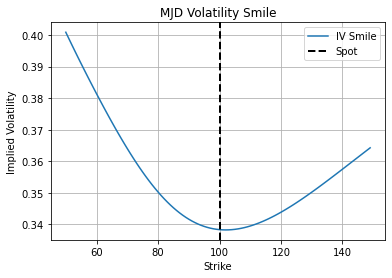

In [96]:
plt.plot(strikes, merton_ivs, label='IV Smile')
plt.xlabel('Strike')
plt.ylabel('Implied Volatility')
plt.axvline(S, color='black', linestyle='dashed', linewidth=2,label="Spot")
plt.title('MJD Volatility Smile')
plt.grid(True)
plt.legend()

### Optimal Parameter

In [98]:
import pandas as pd
import time
from scipy.optimize import minimize

df = pd.read_csv('https://raw.githubusercontent.com/codearmo/data/master/calls_calib_example.csv')

df.head()

,Strike,Moneyness,Bid,Midpoint,Ask,F,T
0,900.0,0.76,2856.1,2867.55,2879.0,3803.79,0.74
1,1000.0,0.74,2757.0,2768.45,2779.9,3803.79,0.74
2,1100.0,0.71,2658.0,2669.45,2680.9,3803.79,0.74
3,1200.0,0.68,2559.1,2570.55,2582.0,3803.79,0.74
4,1300.0,0.66,2460.3,2471.75,2483.2,3803.79,0.74


In [104]:
df['T'].values[0]

0.74

In [107]:
def optimal_params(x,mkt_prices,strikes):
    candidate_prices= MJ_call(S, strikes, T, r, sigma=x[0],m=x[1],v=x[2],lam=x[3])
    return np.linalg.norm(mkt_prices-candidate_prices,2)

In [116]:
T= df['T'].values[0]
S= df['F'].values[0]
strikes= df['Strike'].values
prices= df['Midpoint'].values
r= 0

x0= [0.15,1,0.1,1]    #initial guess
bounds= ((0.01,np.inf),(0.01,2),(1e-5,np.inf),(0,5))  #bounds as discussed
#SLSQP minimizes a function of several variables 
#with any combination of bounds, equality and inequality constraints
res= minimize(fun=optimal_params,method='SLSQP',x0=x0,args=(prices,strikes),bounds=bounds,tol=1e-20,options={"maxiter":1000})

calc_sigma= res.x[0]
calc_mt= res.x[1]
calc_vt= res.x[2]
lamt= res.x[3]


In [117]:
print('Calibrated Volatlity = ', calc_sigma)
print('Calibrated Jump Mean = ', calc_mt)
print('Calibrated Jump Std = ', calc_vt)
print('Calibrated intensity = ', lamt)


Calibrated Volatlity =  0.06489456681929835
Calibrated Jump Mean =  0.878905460959084
Calibrated Jump Std =  0.1542041677356296
Calibrated intensity =  0.9722979865314584


Text(0.5, 1.0, 'Merton Model Optimal Parameters')

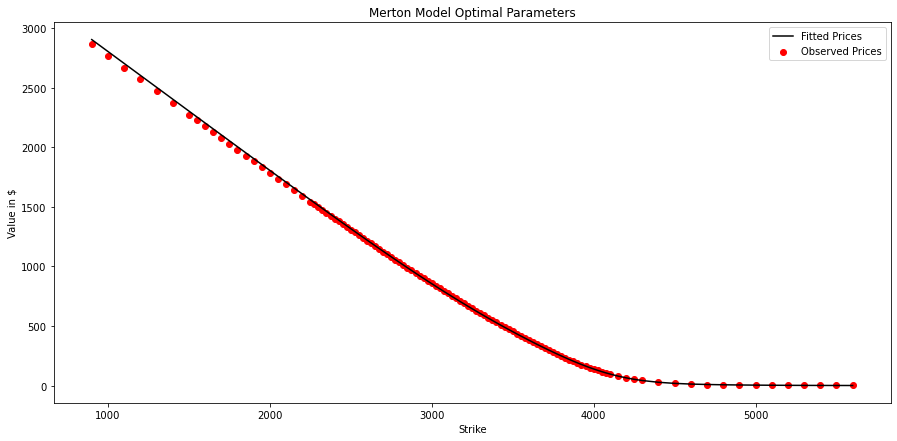

In [123]:
df['least_sq_V'] = MJ_call(S, df.Strike, df['T'], 0 ,calc_sigma, calc_mt, calc_vt, lamt)
plt.figure(figsize=(15,7))
plt.scatter(df.Strike, df.Midpoint,color='red',label= 'Observed Prices')
plt.plot(df.Strike, df.least_sq_V, color='black',label= 'Fitted Prices')
plt.legend()
plt.xlabel('Strike')
plt.ylabel('Value in $')
plt.title('Merton Model Optimal Parameters')
 #path dependent option